In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Answer 1

In [2]:
airline = pd.read_excel('EastWestAirlines.xlsx')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### K - mean

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
airline_scaled = scaler.fit_transform(airline.iloc[:,1:])

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airline_scaled)
    wcss.append(kmeans.inertia_)

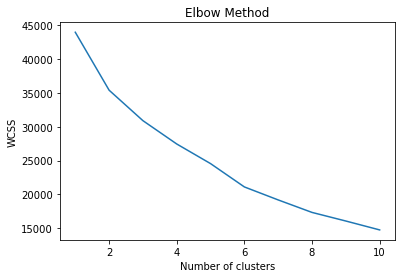

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
from sklearn.cluster import KMeans
clusters = KMeans(6, random_state=27000)
clusters.fit(airline_scaled)

KMeans(n_clusters=6, random_state=27000)

In [8]:
clusters.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [9]:
airline['cluster_id'] = clusters.labels_
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [10]:
clusters.cluster_centers_

array([[-0.15884056,  0.12489137, -0.26336162, -0.09824189, -0.06276658,
        -0.2684888 , -0.11455844, -0.040052  , -0.04156473,  0.05138417,
         1.29375454],
       [ 0.62883567, -0.01714944,  1.48749524, -0.09824189, -0.05142102,
         1.26645736,  0.83800632, -0.07112891, -0.07251646,  0.45985924,
         0.44164254],
       [-0.30016774, -0.09325078, -0.54624772, -0.09824189, -0.06029789,
        -0.51342583, -0.4654329 , -0.21954843, -0.24107278, -0.24188659,
        -0.7669193 ],
       [ 1.19516878,  0.77823971,  0.12363552, -0.09824189, -0.06276658,
         0.65704194,  1.69008025,  3.70385646,  3.98117095,  0.29933476,
         0.88415381],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.051

In [11]:
airline.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1964.090798,57596.066258,240.726380,1.696933,1.000000,1.000000,10661.392638,10.501840,403.981595,1.215951,4224.661350,0.995092
1,1,1495.132890,136964.736434,130.848283,4.107420,1.000000,1.002215,47727.192691,19.648948,360.472868,1.098560,5068.111849,0.583610
2,2,2279.480964,43355.506024,71.978795,1.307470,1.000000,1.000482,4746.666024,7.132530,152.680482,0.459277,3619.093494,0.000000
3,3,1715.844595,194030.195946,746.135135,2.229730,1.000000,1.000000,33011.060811,27.831081,5645.581081,16.472973,4736.648649,0.797297
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


### Hierarchical Clustering

In [12]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [13]:
airline=airline.drop(columns=['cluster_id'])
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
DF_norm = norm_func(airline.iloc[:,1:])

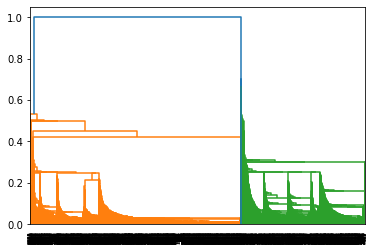

In [16]:
from matplotlib import pyplot as plt
import seaborn as sn

dendrogram = sch.dendrogram(sch.linkage(DF_norm, method='single'))

In [17]:
HC = AgglomerativeClustering(n_clusters=6, affinity = 'cosine', linkage = 'single')

In [18]:
DF_HC = HC.fit_predict(DF_norm)
Clusters=pd.DataFrame(DF_HC,columns=['Cluster_id'])
Clusters

,Cluster_id
0,0
1,0
2,0
3,0
4,5
...,...
3994,5
3995,5
3996,5
3997,0


In [19]:
airline['cluster_id'] = Clusters.Cluster_id
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5


In [20]:
airline.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2169.894378,59961.226506,88.587550,1.712048,1.000000,1.006024,10151.393173,9.093173,227.330924,0.653815,3825.278715,0
1,1,2398.840000,43494.400000,0.000000,1.000000,2.360000,1.000000,11483.320000,13.800000,150.000000,0.600000,3544.400000,0
2,2,3169.000000,72811.000000,0.000000,1.000000,1.000000,4.500000,65932.500000,10.500000,0.000000,0.000000,2204.000000,0
3,3,2862.000000,8557.000000,0.000000,1.000000,1.000000,1.000000,200622.000000,5.000000,622.000000,3.000000,1955.000000,1
4,4,2694.000000,59704.000000,0.000000,4.000000,2.000000,1.000000,57404.000000,14.000000,0.000000,0.000000,2440.000000,0
5,5,1744.838514,97112.845946,240.358784,2.662838,1.015541,1.018243,28789.389865,15.789865,857.660135,2.599324,4626.866216,1


### DBSCAN

In [21]:
airline3 = pd.read_excel('EastWestAirlines.xlsx')
airline3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [22]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [23]:
airline3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [24]:
array=airline3.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [25]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [26]:
DB = DBSCAN(eps=0.90, min_samples=6,metric='euclidean')
DB.fit(X)

DBSCAN(eps=0.9, min_samples=6)

In [27]:
DB.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
airline3['cluster_id'] = DB.labels_
airline3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [29]:
airline3.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1778.325641,159068.610256,705.087179,2.629487,1.062821,1.062821,35778.926923,20.350000,1873.253846,5.428205,4591.050000,0.658974
1,0,2177.896320,51220.720826,0.955566,1.637343,1.000000,1.000000,8637.406194,8.183573,89.355476,0.302962,3805.112657,0.000000
2,1,1808.779749,55784.591858,3.746347,2.574113,1.000000,1.000000,21691.128392,12.311065,177.861169,0.580376,4495.494781,1.000000
3,2,190.333333,119323.666667,0.000000,1.000000,1.000000,1.000000,7916.666667,9.000000,1583.333333,5.333333,6897.666667,1.000000
4,3,957.166667,257327.333333,0.000000,5.000000,1.000000,1.000000,64633.666667,16.666667,666.666667,1.500000,5907.833333,1.000000
5,4,2912.555556,26315.555556,0.000000,1.000000,2.000000,1.000000,8393.666667,11.777778,0.000000,0.000000,2693.333333,0.000000
6,5,3215.375000,28382.500000,2578.500000,1.000000,1.000000,1.000000,2130.875000,3.500000,50.000000,0.375000,1864.875000,0.000000
7,6,3822.142857,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.000000


# Answer 2

In [32]:
crime = pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### K - mean

In [34]:
from sklearn.cluster import KMeans

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime.iloc[:,1:])

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Kishor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


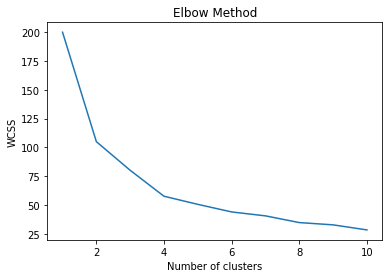

In [37]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
from sklearn.cluster import KMeans
cluster2 = KMeans(3, random_state=100)
cluster2.fit(crime_scaled)

KMeans(n_clusters=3, random_state=100)

In [39]:
cluster2.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [40]:
crime['cluster_id'] = cluster2.labels_
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [47]:
crime.rename(columns = {'Unnamed: 0':'City'}, inplace = True)
crime

,City,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [52]:
crime.groupby('cluster_id').agg(['mean']).reset_index()


,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.594737,136.105263,71.578947,18.494737
1,1,12.165000,255.250000,68.400000,29.165000
2,2,3.618182,77.000000,49.909091,11.536364


### Hierarchical Clustering

In [54]:
crime2 = pd.read_csv('crime_data.csv')
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [55]:
crime2.rename(columns = {'Unnamed: 0':'City'}, inplace = True)
crime2.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [56]:
def norm_func2(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [57]:
DF_norm1 = norm_func2(crime2.iloc[:,1:])

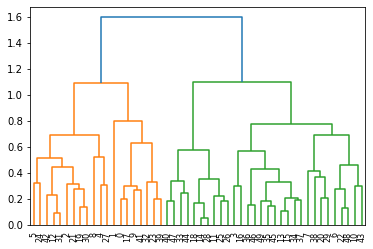

In [99]:
from matplotlib import pyplot as plt
import seaborn as sn

dendrogram2 = sch.dendrogram(sch.linkage(DF_norm1, method='complete'))

In [95]:
HC2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [96]:
DF_HC2 = HC2.fit_predict(DF_norm1)
Clusters2=pd.DataFrame(DF_HC2,columns=['Cluster_id'])
Clusters2

,Cluster_id
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [97]:
crime2['cluster_id'] = Clusters2.Cluster_id
crime2.head()

,City,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [98]:
crime2.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


### DBSCAN

In [101]:
crime3 = pd.read_csv('crime_data.csv')
crime3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [106]:
crime3.drop(axis=0, columns='City',inplace=True)
crime3.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [107]:
crime_array=crime3.values
crime_array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [108]:
stscaler2 = StandardScaler().fit(crime_array)
X2 = stscaler2.transform(crime_array)

In [178]:
DB2 = DBSCAN(eps=1.0, min_samples=3,metric='euclidean')
DB2.fit(X2)

DBSCAN(eps=1.0, min_samples=3)

In [179]:
crime3['cluster_id'] = DB2.labels_
crime3.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [180]:
crime3.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.560,243.500000,70.800000,30.430000
1,0,14.950,237.000000,55.833333,22.616667
2,1,4.825,112.035714,63.357143,16.107143
3,2,11.400,234.666667,83.000000,25.200000
4,3,11.600,280.000000,70.333333,31.666667
